# Name: Souri Rishik Volety
# Reg No: 230968004

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist, bigrams

from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional

from spellchecker import SpellChecker

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

2025-09-11 09:03:50.332971: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to /home/mca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_train = pd.read_csv('Train.csv')
df_val = pd.read_csv('Valid.csv')
df_test = pd.read_csv('Test.csv')

print(df_train.head())

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


In [3]:
df_val.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [4]:
df_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [5]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(40000, 2)
(5000, 2)
(5000, 2)


In [6]:
print("info about Train: ")
print(df_train.info())
print("-"*50)
print("info about Validation: ")
print(df_val.info())
print("-"*50)
print("info about Test: ")
print(df_test.info())

info about Train: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
None
--------------------------------------------------
info about Validation: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None
--------------------------------------------------
info about Test: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   lab

In [7]:
print("Null values in Train: ")
print(df_train.isna().sum())
print("-"*50)
print("Null values in val: ")
print(df_val.isna().sum())
print("-"*50)
print("Null values in Test: ")
print(df_test.isna().sum())

Null values in Train: 
text     0
label    0
dtype: int64
--------------------------------------------------
Null values in val: 
text     0
label    0
dtype: int64
--------------------------------------------------
Null values in Test: 
text     0
label    0
dtype: int64


In [8]:
import emoji
import re
import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

nltk.download('stopwords')
nltk.download('punkt')

port_stemmer = PorterStemmer()

def preprocessing(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r'[^\w\s,.!?]', '', text)
    text = text.split()
    text = [port_stemmer.stem(word) for word in text if not word in stop_words]
    return text

df_train["processed"] = df_train["text"].apply(preprocessing)
df_test["processed"] = df_test["text"].apply(preprocessing)
df_val["processed"] = df_val["text"].apply(preprocessing)

[nltk_data] Downloading package stopwords to /home/mca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(32007, 3)
(5000, 3)
(5000, 3)


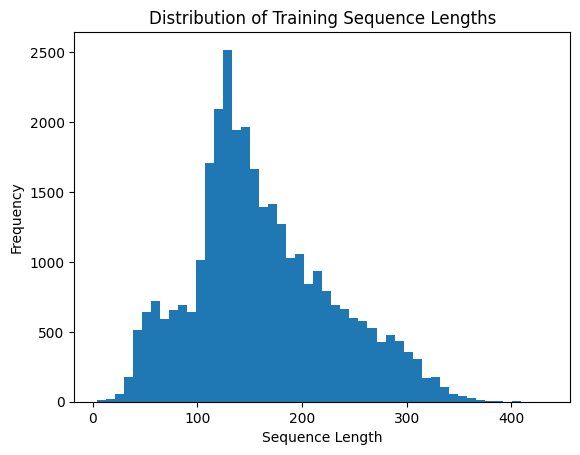

Max: 435
Mean: 162.41
90th percentile: 261.0


In [11]:
import matplotlib.pyplot as plt
lengthes = []
for i in df_train["text"]:
    lengthes.append(len(i.split()))

plt.hist(lengthes, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Training Sequence Lengths")
plt.show()

print(f"Max: {max(lengthes)}")
print(f"Mean: {sum(lengthes)/len(lengthes):.2f}")
print(f"90th percentile: {np.percentile(lengthes, 90)}")

In [13]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/mca/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /home/mca/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/mca/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/mca/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/mca/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /home/mca/nltk_da

True

In [14]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')

df_train['tokens'] = df_train['text'].apply(word_tokenize)
df_val['tokens'] = df_val['text'].apply(word_tokenize)
df_test['tokens'] = df_test['text'].apply(word_tokenize)

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_train['tokens'])  # Fit only on training data

train_sequences = tokenizer.texts_to_sequences(df_train['tokens'])
val_sequences = tokenizer.texts_to_sequences(df_val['tokens'])
test_sequences = tokenizer.texts_to_sequences(df_test['tokens'])

[nltk_data] Downloading package punkt to /home/mca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
max_length = 180  # Adjust based on your data

# Apply padding and truncation
padded_train = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
padded_val = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [16]:
import numpy as np

y_train = np.array(df_train['label'])
y_val = np.array(df_val['label'])
y_test = np.array(df_test['label'])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

history_lstm = model_lstm.fit(
    padded_train, y_train,
    validation_data=(padded_val, y_val),
    epochs=5,
    batch_size=64
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(padded_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 180, 64)           320000    
                                                                 
 lstm_4 (LSTM)               (None, 180, 64)           33024     
                                                                 
 lstm_5 (LSTM)               (None, 180, 64)           33024     
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 419137 (1.60 MB)
Trainable params: 419137 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
501/501 

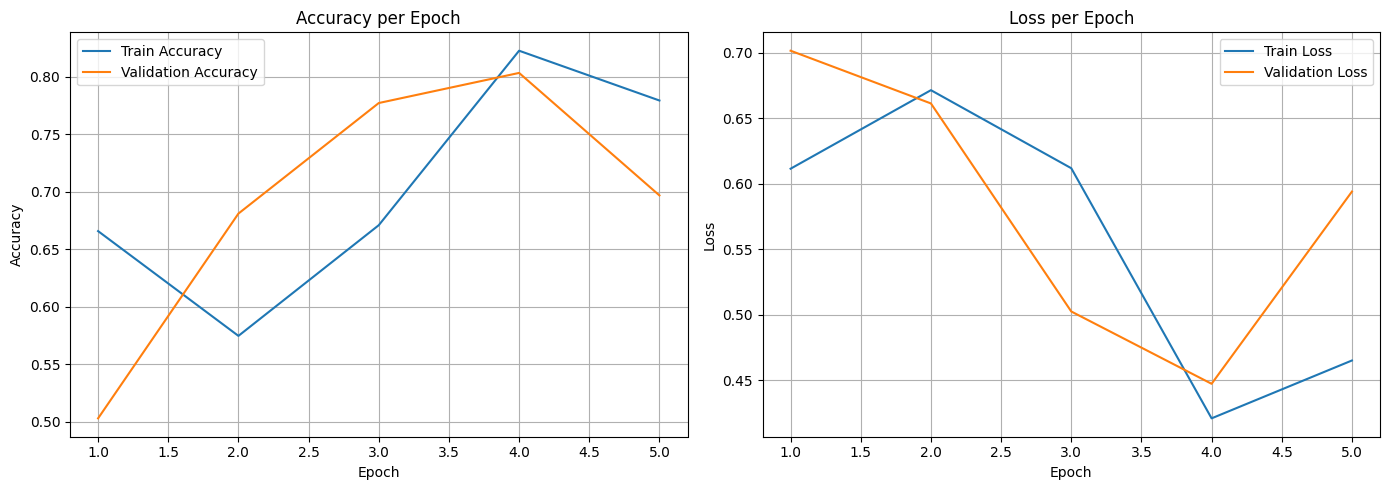

In [20]:
epochs = range(1, len(history_lstm.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_lstm.history['loss'], label='Train Loss')
plt.plot(epochs, history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
model_bidir = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidir.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 180, 64)           320000    
                                                                 
 bidirectional (Bidirection  (None, 180, 128)          66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 180, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 180, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 180, 128)          98816     
 onal)                                                

In [25]:
history_bidir = model_bidir.fit(
    padded_train, y_train,
    validation_data=(padded_val, y_val),
    epochs=2,
    batch_size=256
)

Epoch 1/2
126/126 [==============================] - 267s 2s/step - loss: 0.3597 - accuracy: 0.8470 - val_loss: 0.3904 - val_accuracy: 0.8382
Epoch 2/2
126/126 [==============================] - 272s 2s/step - loss: 0.2694 - accuracy: 0.8930 - val_loss: 0.3582 - val_accuracy: 0.8402


In [26]:
val_preds = model_bidir.predict(padded_val)
val_pred_labels = (val_preds > 0.5).astype(int).flatten()

print("Validation Accuracy:", accuracy_score(y_val, val_pred_labels))
print(classification_report(y_val, val_pred_labels))

157/157 [==============================] - 25s 152ms/step
Validation Accuracy: 0.8402
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2486
           1       0.82      0.88      0.85      2514

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



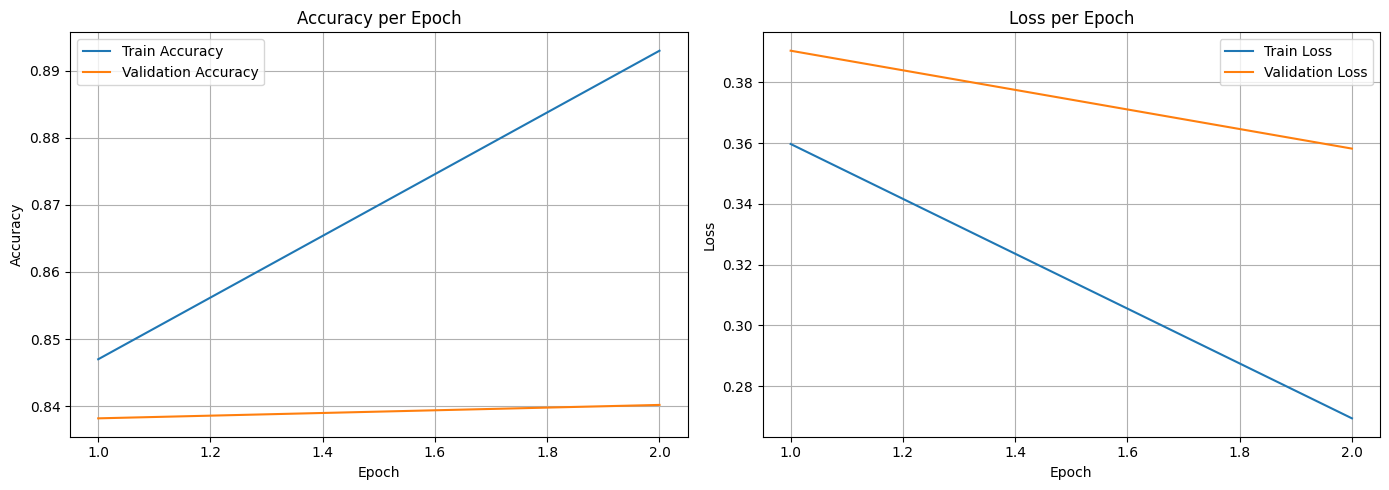

In [27]:
epochs = range(1, len(history_bidir.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_bidir.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history_bidir.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_bidir.history['loss'], label='Train Loss')
plt.plot(epochs, history_bidir.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
my_reviews = [
    "Absolutely loved this movie! The plot and acting were fantastic.",
    "Worst movie I have ever seen. Totally boring and bad acting.",
    "The movie was okay, not the best but still enjoyable.",
    "Amazing cinematography and brilliant storytelling.",
    "Poor direction and a very predictable story.",
    "I was hooked from beginning to end. Great experience!",
    "The dialogue was cheesy and the characters were one-dimensional.",
    "Fantastic soundtrack and excellent performances.",
    "Not worth watching. Waste of time.",
    "An emotional rollercoaster with a heartwarming ending."
]

my_labels = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]

In [31]:
my_clean = [word_tokenize(r) for r in my_reviews]
my_seq = tokenizer.texts_to_sequences(my_clean)
my_pad = pad_sequences(my_seq, maxlen=5000, padding='post')

my_preds = model_bidir.predict(my_pad)
my_pred_labels = (my_preds > 0.5).astype(int).flatten()

import pandas as pd

results = pd.DataFrame({
    'Review': my_reviews,
    'Cleaned': my_clean,
    'True Label': my_labels,
    'Predicted Label': my_pred_labels
})

print(results)
print(f"Custom test set accuracy: {accuracy_score(my_labels, my_pred_labels)}")

1/1 [==============================] - 4s 4s/step
                                              Review  \
0  Absolutely loved this movie! The plot and acti...   
1  Worst movie I have ever seen. Totally boring a...   
2  The movie was okay, not the best but still enj...   
3  Amazing cinematography and brilliant storytell...   
4       Poor direction and a very predictable story.   
5  I was hooked from beginning to end. Great expe...   
6  The dialogue was cheesy and the characters wer...   
7   Fantastic soundtrack and excellent performances.   
8                 Not worth watching. Waste of time.   
9  An emotional rollercoaster with a heartwarming...   

                                             Cleaned  True Label  \
0  [Absolutely, loved, this, movie, !, The, plot,...           1   
1  [Worst, movie, I, have, ever, seen, ., Totally...           0   
2  [The, movie, was, okay, ,, not, the, best, but...           1   
3  [Amazing, cinematography, and, brilliant, stor...         

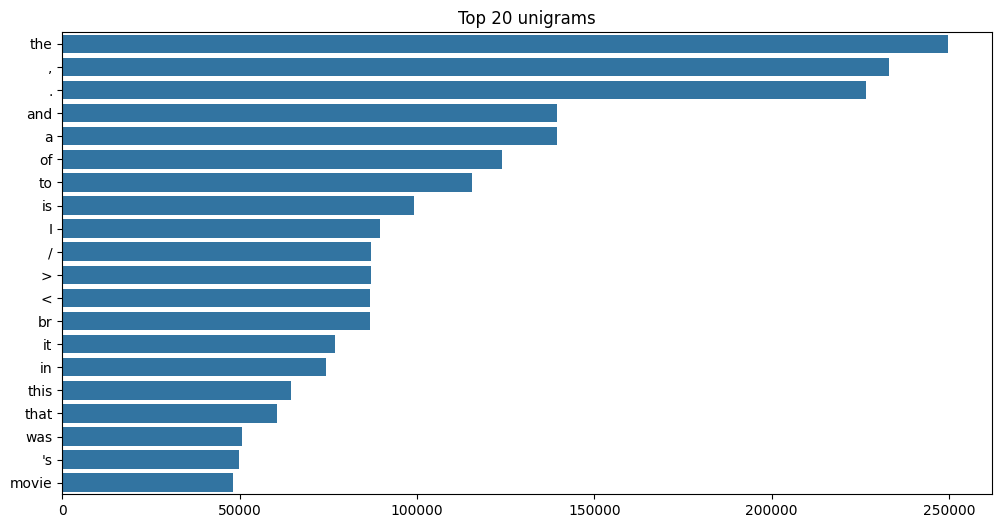

In [33]:
all_tokens = [tok for tokens in df_train['tokens'] for tok in tokens]
fdist = FreqDist(all_tokens)
common = fdist.most_common(20)
words, counts = zip(*common)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 unigrams')
plt.show()

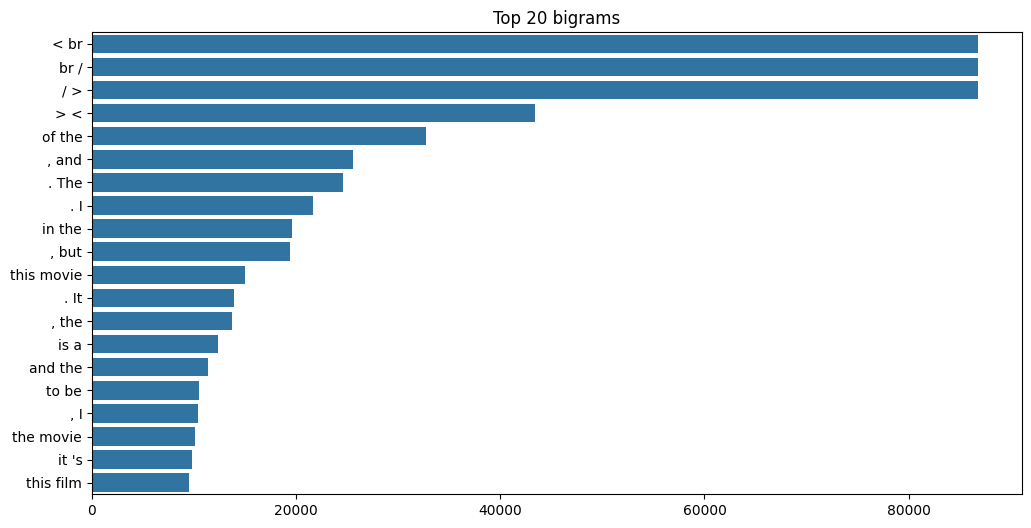

In [34]:
all_bigrams = [bg for tokens in df_train['tokens'] for bg in bigrams(tokens)]
bigram_freq = FreqDist(all_bigrams)
top_bigrams = bigram_freq.most_common(20)
bigram_words = [' '.join(b) for b, cnt in top_bigrams]
bigram_counts = [cnt for b, cnt in top_bigrams]

plt.figure(figsize=(12,6))
sns.barplot(x=bigram_counts, y=bigram_words)
plt.title('Top 20 bigrams')
plt.show()